<bound method NDFrame.head of        dedxCTOF   dedxCND      beta  momentum  particle
3     14.305717 -999999.0  0.239387  0.472008         1
6     12.584995 -999999.0  0.285102  0.402184         0
10    10.484554 -999999.0  0.268693  0.516508         1
11    15.530583 -999999.0  0.278125  0.571352         1
12    10.037273 -999999.0  0.244382  0.464023         1
...         ...       ...       ...       ...       ...
5736  22.925468 -999999.0  0.296651  0.640038         1
5742   2.549436 -999999.0  0.213682  0.510953         1
5743  10.112774 -999999.0  0.549482  0.501630         0
5746  24.674879 -999999.0  0.297228  0.628445         1
5749  25.142050 -999999.0  0.306233  0.615992         1

[1755 rows x 5 columns]>
(1755, 5)
(8522, 5)


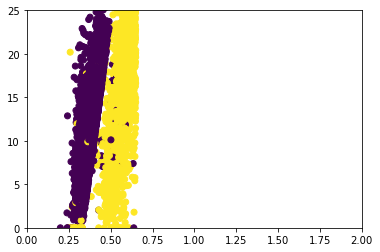

In [1]:
import pandas as pd 
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt 


# This is how I visualized the data and the cuts you see are how I made the selection of which events to use
# ThisIsATest - is the real data with the tight chi2 cut
#  Proton - this is the training data from the event generator

deuteron = pd.read_csv('Deuteron.csv',index_col=False)
proton = pd.read_csv('Proton.csv',index_col=False)

deuteron = deuteron.loc[(deuteron["momentum"] < 0.65)]
proton = proton.loc[(proton["momentum"] * 142 - 47 < proton["dedxCTOF"])]
# proton = proton.loc[proton["momentum"] <0.50]

deuteron.head
# deuteron = deuteron.loc[(deuteron["dedxCND"] > 0) ]
# proton = proton.loc[(proton["dedxCND"] > 0) ]
print(deuteron.head)
deuteron.size
# df2= df1.iloc[:9376,:]

proton = proton.iloc[:6767,:] # for ctof use 5705 for CND use 3621
# df1 = df1.iloc[:,:]
print(deuteron.shape)

dftotal = deuteron.append(proton)
print(dftotal.shape)

plt.scatter(dftotal.iloc[:,3],dftotal.iloc[:,0],c=dftotal.iloc[:,-1])



plt.ylim(0,25)
plt.xlim(0,2)
plt.show()







(3809, 6)
<bound method NDFrame.head of        dedxCTOF        dedxCND      beta  momentum       chi2  particle
0      6.466548 -999999.000000  0.257710  0.511918   1.282938         1
1     15.707973 -999999.000000  0.354995  0.580481  -8.262937         1
2     13.217325 -999999.000000  0.264202  0.625468   9.622746         1
3     17.408062 -999999.000000  0.305829  0.555502  -3.834726         1
4      4.747382 -999999.000000  0.228062  0.498023   7.499815         1
...         ...            ...       ...       ...        ...       ...
6760   8.794526       2.985556  0.365120  0.556926 -12.401217         1
6762   4.990161 -999999.000000  0.233118  0.521693   8.181205         1
6763  11.770180 -999999.000000  0.269536  0.532713   0.690528         1
6764  15.409381       5.662120  0.143906  0.558015 -11.608276         1
6766   2.966366 -999999.000000  0.175485  0.407757  16.206337         1

[3809 rows x 6 columns]>
(3809, 6)


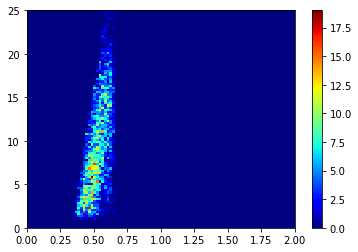

In [66]:
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

# In this cell I was playing around with hard coding the boundary for the low momentum after the machine learning did not work out how I wanted

deuteron = pd.read_csv('ThisIsATest.csv',index_col=False)
deuteron = deuteron.loc[(deuteron["momentum"] < 0.65)]

# This is the boundary that I was playing around wtih. BY changing these values you can see how it responds in the plot below.
deuteron = deuteron.loc[(deuteron["momentum"] * 102 - 35 > deuteron["dedxCTOF"]) ]

proton = pd.read_csv('Proton.csv',index_col=False)
proton = proton.loc[(proton["momentum"] * 150 - 50 < proton["dedxCTOF"]) ]


# deuteron = deuteron.loc[(deuteron["dedxCTOF"] > 0.0) ]
# deuteron = deuteron.loc[(deuteron["dedxCND"] > 0.0) ]
# deuteron = deuteron.drop(labels="beta", axis=1)
print(deuteron.shape)
print(deuteron.head)

# deuteron = deuteron.iloc[:57500,:]

print(deuteron.shape)
# df = df.iloc[:200000,:]
# df.head
# x=[]
# y=[]


    
# x = np.array(df.iloc[:, 0:1])
# y = np.array(df.iloc[:, 2:3])
# print(x)

x = []
for i in deuteron['momentum']:
    x.append(i)
    
y=[]
for i in deuteron['dedxCTOF']:
    y.append(i)


# x = []
# for i in proton['momentum']:
#     x.append(i)
    
# y=[]
# for i in proton['dedxCTOF']:
#     y.append(i)

plt.hist2d(x, y, bins=(100,100), cmap=plt.cm.jet,range=[[0,2],[0,25]])
plt.colorbar()
plt.show()


# ax = df.plot.scatter(x="momentum", y="dedxCTOF",cmap="viridis")
# ax.set_xlim([0,4])
# ax.set_ylim([0,10])

# plt.show()

In [2]:
# HIGHER MOMENTUM MACHINE LEARNING FOR HOW I GO THE WEIGHTS



from sklearn.linear_model import LogisticRegression
#this model i only care about dedx ctof and momentum i do not care if there is no dedx cnd i include both events
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics



deuteron = pd.read_csv('Deuteron.csv',index_col=False)
proton = pd.read_csv('Proton.csv',index_col=False)
deuteron = deuteron.loc[(deuteron["dedxCTOF"] > 0.8)]
print("shape of deuteron",deuteron.shape)

proton = proton.loc[(proton["dedxCTOF"] > 0.8) ]
proton.size
# deuteron = deuteron.loc[(deuteron["dedxCND"] < 0)]
# proton = proton.loc[(proton["dedxCND"] < 0)]
proton = proton.iloc[:5705,:]



totalData = deuteron.append(proton)

totalData = totalData.drop('beta',1)
totalData = totalData.drop('dedxCND',1)
totalData.size
training_data, testing_data = train_test_split(totalData, test_size=0.2, random_state=25)



training_dataX = training_data.iloc[:,:-1]
training_datay = training_data.iloc[:,-1]
testing_datay = testing_data.iloc[:,-1]
testing_dataX = testing_data.iloc[:,:-1]


print(training_dataX.shape) 
print(training_datay.shape)

print(testing_dataX.shape) 
print(testing_datay.shape)


poly = PolynomialFeatures(2) # 1 a b a^2 ab  b^2 
training_dataX = poly.fit_transform(training_dataX)
training_dataX = pd.DataFrame(training_dataX)

testing_dataX = poly.fit_transform(testing_dataX)
testing_dataX = pd.DataFrame(testing_dataX)



clf = LogisticRegression(random_state=1,max_iter=1000000).fit(training_dataX, training_datay)
print(clf.predict(testing_dataX))
print(clf.predict_proba(testing_dataX))
print(clf.score(testing_dataX, testing_datay))
predictions = clf.predict(testing_dataX)
score = clf.score(testing_dataX, testing_datay)
cm = metrics.confusion_matrix(testing_datay, predictions)
print(cm)

print("these are the wdights to use")
print(clf.intercept_)
print(clf.coef_)











shape of deuteron (5700, 5)
(9124, 2)
(9124,)
(2281, 2)
(2281,)
[0 0 0 ... 0 0 1]
[[0.81990433 0.18009567]
 [0.76611794 0.23388206]
 [0.85293898 0.14706102]
 ...
 [0.75637707 0.24362293]
 [0.82765605 0.17234395]
 [0.41443304 0.58556696]]
0.9149495835160018
[[1034   43]
 [ 151 1053]]
these are the wdights to use
[-1.33628776]
[[-1.32727831e+00 -3.57098156e-01 -1.47871201e+00 -4.49621419e-04
   1.18497970e+00 -1.43473735e-01]]


<bound method NDFrame.head of            dedxCTOF        dedxCND      beta   momentum       chi2  particle
0         15.732395 -999999.000000  0.506912   4.241635  13.630116         1
1         11.183661 -999999.000000  0.439852   0.763036  -6.323644         1
2          5.987475 -999999.000000  0.900219   6.493397   1.508832         1
3         33.703693 -999999.000000  0.629928   1.533510   0.109878         1
4          2.212595 -999999.000000  0.710033  13.230361   7.331400         1
...             ...            ...       ...        ...        ...       ...
18020186  12.765067 -999999.000000  0.376180   0.809709   2.020215         1
18020187   4.665542 -999999.000000  0.365885   0.883482   8.407668         1
18020188   9.158322 -999999.000000  0.416917   2.933337  21.671167         1
18020189  14.368548       6.735509  0.297473   0.586009   0.102749         1
18020190  52.194733 -999999.000000  0.362098   1.330971  14.978233         1

[18020191 rows x 6 columns]>


<ipython-input-42-d95fa84abdae>:28: RuntimeWarning: overflow encountered in double_scalars
  value = 1 / (1+math.e**(-value))


61120
average chi2 9.745319864686525


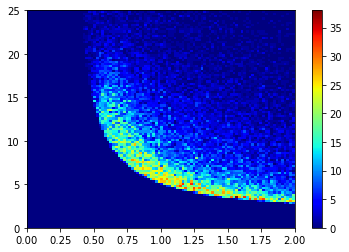

In [42]:
##Testing the model on real data FOR THE HIGHER MOMENTUM
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import math



deuteron = pd.read_csv('RealData.csv',index_col=False)
deuteron = deuteron.loc[(deuteron["dedxCTOF"] > 0)]
# deuteron = deuteron.loc[(deuteron["dedxCND"] > 0)]
numProtons=0
print(deuteron.head)
p = 0
parray = []

chi2 = 0
chi2array = []

dedx = 0
dedxarray = []
for i in range(100000):
    
        
    # value = deuteron.iloc[i,0]*0.1952  + deuteron.iloc[i,3]*0.0183 - 2.1
    value = 1 * -1.4312+ deuteron.iloc[i,0]* -0.3393 + deuteron.iloc[i,3]*-1.50607950 + deuteron.iloc[i,0]**2 * -4.60865322e-04 + deuteron.iloc[i,0]*deuteron.iloc[i,3] *1.18195972 +deuteron.iloc[i,3]**2 * -6.66171502e-03 -1.43514474
    value = 1 / (1+math.e**(-value))
    if (value > 0.5):

        numProtons+=1
        p += abs(deuteron.iloc[i,3])
        parray.append((deuteron.iloc[i,3]))
        dedx += abs(deuteron.iloc[i,0])
        dedxarray.append((deuteron.iloc[i,0]))
        
        chi2 += abs(deuteron.iloc[i,4])
        chi2array.append((deuteron.iloc[i,4]))
        # print("Prediction:", value, " Chi2pid" , deuteron.iloc[i,4])
    
print(numProtons)
print("average chi2", chi2/numProtons)


n_bins = 100

# plt.hist(parray, 100, range=[0, 2], facecolor='gray', align='mid')


plt.hist2d(parray, dedxarray, bins=(100,100), cmap=plt.cm.jet,range=[[0,2],[0,25]])
plt.colorbar()
plt.show()

# n_bins = 50

# fig, axs = plt.subplots(1, 1,
#                         figsize =(10, 7),
#                         tight_layout = True)
# axs.set_ylim([0,18500]) 
# axs.hist(chi2array, bins = n_bins)
 
# # Show plot
# plt.show()

In [71]:
# import pandas as pd
# import numpy as np
# from sklearn import datasets 
# import matplotlib.pyplot as plt
# from sklearn import metrics
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# import matplotlib.pyplot as plt
# import seaborn as sns

# import pandas as pd
# #first attempt at random forest

# deuteron = pd.read_csv('Deuteron.csv',index_col=False)
# proton = pd.read_csv('Proton.csv',index_col=False)
# deuteron.head
# deuteron = deuteron.loc[(deuteron["dedxCTOF"] > 0)]
# proton = proton.loc[(proton["dedxCTOF"] > 0)]

# deuteron = deuteron.drop('dedxCND',1)
# print(deuteron.shape)
# proton = proton.drop('dedxCND',1)

# # deuteron = deuteron.loc[(deuteron["dedxCND"] > 0)]
# # proton = proton.loc[(proton["dedxCND"] > 0)]



# proton= proton.iloc[:3614,:]
# # print(proton.shape)
# totalData = deuteron.append(proton)
# totalData = totalData.drop(labels="beta", axis=1)

# X = totalData.iloc[:,:-1]

# # print("this is x")
# # print(X)
# y = totalData.iloc[:, -1]

# training_dataX = X.sample(frac=0.8, random_state=25)

# training_datay = y.sample(frac=0.8, random_state=25)

# testing_dataX = X.drop(training_dataX.index)
# testing_datay = y.drop(training_datay.index)

# clf=RandomForestClassifier(n_estimators=100)

# clf.fit(training_dataX,training_datay)

# print(clf.score(testing_dataX, testing_datay))
# predictions = clf.predict(testing_dataX)
# score = clf.score(testing_dataX, testing_datay)
# cm = metrics.confusion_matrix(testing_datay, predictions)
# print(cm)
# # plt.figure(figsize=(5,5))
# # sns.heatmap(cm, annot=True, fmt=".0f", linewidths=3, square = True, cmap = 'Blues_r')
# # plt.ylabel('Actual label')
# # plt.xlabel('Predicted label')
# # all_sample_title = 'Accuracy Score: {0}'.format(score)
# # plt.title(all_sample_title, size = 10)



# # Model Validation 

# realData = pd.read_csv('RealData.csv',index_col=False)
# realData = realData.loc[(realData["dedxCTOF"] > 0)]
# # print("the real data looks like")
# # print(realData.head)
# realData = realData.drop(labels="beta", axis=1)
# realData = realData.drop(labels="dedxCND", axis=1)


# print("the real data looks like")
# print(realData.head)


# p = 0
# parray = []

# chi2 = 0
# chi2array = []

# dedx = 0
# dedxarray = []

# numProtons=0
# print("This is what the input to the model is")
# print(realData.iloc[0,0:2:1])

# for i in range(10000):
#     y_pred=clf.predict([realData.iloc[i,0:2:1]])
#     print(i, y_pred)
#     if (y_pred ==  1):
#         numProtons+=1
#         p += abs(realData.iloc[i,1])
#         parray.append((realData.iloc[i,1]))
#         dedx += abs(realData.iloc[i,0])
#         dedxarray.append((realData.iloc[i,0]))
        
#         chi2 += abs(realData.iloc[i,2])
#         chi2array.append((realData.iloc[i,2]))
        
# # Model Accuracy, how often is the classifier correct?
# # y_pred=clf.predict(testing_dataX)


# n_bins = 100

# # plt.hist(parray, 100, range=[0, 2], facecolor='gray', align='mid')


# plt.hist2d(parray, dedxarray, bins=(100,100), cmap=plt.cm.jet,range=[[0,2],[0,25]])
# plt.colorbar()
# plt.show()
# print("averate Chi2 =" , chi2/numProtons)
# print("Num Deuterons" , numProtons)
# # print("Accuracy:",metrics.accuracy_score(testing_datay, y_pred))

# # n_bins = 50

# # fig, axs = plt.subplots(1, 1,
# #                         figsize =(10, 7),
# #                         tight_layout = True)
# # axs.set_ylim([0,18500]) 
# # axs.hist(chi2array, bins = n_bins)
 
# # Show plot
# plt.show()

(2275, 5)
(4557, 3)
(3645, 2)
(3645,)
(912, 2)
(912,)
this is x original shape of x
(4557, 2)
0.819078947368421
[[433  34]
 [131 314]]
[-6.7630222]
[[0.22908711 7.23354897]]


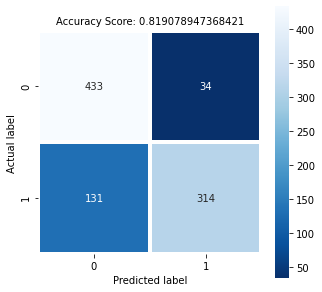

In [56]:
# My attempt at ML FOR THE LOWER MOEMNTUM 


from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

deuteron = pd.read_csv('Deuteron.csv',index_col=False)
proton = pd.read_csv('Proton.csv',index_col=False)
deuteron.head
deuteron = deuteron.loc[(deuteron["dedxCTOF"] > 1)]
proton = proton.loc[(proton["dedxCTOF"] > 1)]
deuteron = deuteron.loc[(deuteron["momentum"] < 0.7)]

print(deuteron.shape)
proton = proton.loc[(proton["momentum"] <0.7)]
# deuteron = deuteron.loc[(deuteron["dedxCND"] < 0)]
# proton = proton.loc[(proton["dedxCND"] < 0)]
proton = proton.iloc[:2282,:]



totalData = deuteron.append(proton)

totalData = totalData.drop('beta',1)
totalData = totalData.drop('dedxCND',1)
print(totalData.shape)


training_data, testing_data = train_test_split(totalData, test_size=0.2, random_state=25)



training_dataX = training_data.iloc[:,:-1]
training_datay = training_data.iloc[:,-1]
testing_datay = testing_data.iloc[:,-1]
testing_dataX = testing_data.iloc[:,:-1]


print(training_dataX.shape) 
print(training_datay.shape)

print(testing_dataX.shape) 
print(testing_datay.shape)


# totalData.head
X = totalData.iloc[:,:-1]
print("this is x original shape of x")
print(X.shape) 
y = totalData.iloc[:,-1]

training_data = totalData.sample(frac=0.8, random_state=25)
testing_data = totalData.drop(training_data.index)

# print("this is x new shape of x")
# print(X.shape)


clf = LogisticRegression(random_state=1).fit(training_dataX, training_datay)

# print(clf.predict(testing_dataX))
# print(clf.predict_proba(testing_dataX))
print(clf.score(testing_dataX, testing_datay))
predictions = clf.predict(testing_dataX)
score = clf.score(testing_dataX, testing_datay)
cm = metrics.confusion_matrix(testing_datay, predictions)
print(cm)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=3, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)


print(clf.intercept_)
print(clf.coef_)

<bound method NDFrame.head of        dedxCTOF       dedxCND      beta  momentum       chi2  particle
0      6.466548 -999999.00000  0.257710  0.511918   1.282938         1
1     15.707973 -999999.00000  0.354995  0.580481  -8.262937         1
2     13.217325 -999999.00000  0.264202  0.625468   9.622746         1
3     17.408062 -999999.00000  0.305829  0.555502  -3.834726         1
4      4.747382 -999999.00000  0.228062  0.498023   7.499815         1
...         ...           ...       ...       ...        ...       ...
6762   4.990161 -999999.00000  0.233118  0.521693   8.181205         1
6763  11.770180 -999999.00000  0.269536  0.532713   0.690528         1
6764  15.409381       5.66212  0.143906  0.558015 -11.608276         1
6765  16.659410 -999999.00000  0.321024  0.490197 -13.040708         1
6766   2.966366 -999999.00000  0.175485  0.407757  16.206337         1

[5629 rows x 6 columns]>
(5629, 6)
4348
average chi2 5.254027063623666


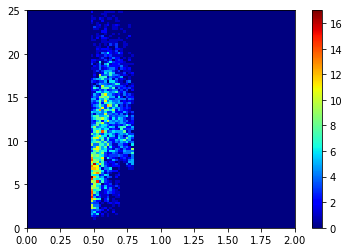

In [68]:
##Testing the model on real data
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import math

deuteron = pd.read_csv('ThisIsATest.csv',index_col=False)
deuteron = deuteron.loc[(deuteron["momentum"] < 0.8)]
# deuteron = deuteron.loc[(deuteron["dedxCND"] > 0)]
numProtons=0
print(deuteron.head)
p = 0
parray = []

chi2 = 0
chi2array = []

dedx = 0
dedxarray = []
print(deuteron.shape)
for i in range(5600):
    
        
    # value = deuteron.iloc[i,0]*0.1952  + deuteron.iloc[i,3]*0.0183 - 2.1
    value = -10.217+ deuteron.iloc[i,0]* 0.00096 + deuteron.iloc[i,3] * 23
    value = 1 / (1+math.e**(-value))
    if (value > 0.7):

        numProtons+=1
        p += abs(deuteron.iloc[i,3])
        parray.append((deuteron.iloc[i,3]))
        dedx += abs(deuteron.iloc[i,0])
        dedxarray.append((deuteron.iloc[i,0]))
        
        chi2 += abs(deuteron.iloc[i,4])
        chi2array.append((deuteron.iloc[i,4]))
        # print("Prediction:", value, " Chi2pid" , deuteron.iloc[i,4])
    
print(numProtons)
print("average chi2", chi2/numProtons)


n_bins = 100

# plt.hist(parray, 100, range=[0, 2], facecolor='gray', align='mid')


plt.hist2d(parray, dedxarray, bins=(100,100), cmap=plt.cm.jet,range=[[0,2],[0,25]]) 
plt.colorbar()
plt.show()

# n_bins = 50

# fig, axs = plt.subplots(1, 1,
#                         figsize =(10, 7),
#                         tight_layout = True)
# axs.set_ylim([0,18500]) 
# axs.hist(chi2array, bins = n_bins)
 
# # Show plot
# plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression

""" This is the lower momentum model using the real data as training data 
"""

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

deuteron = pd.read_csv('ThisIsATest.csv',index_col=False)

deuteron = deuteron.drop('chi2',1)
proton = pd.read_csv('Proton.csv',index_col=False)
print("proton size " , proton.shape)
deuteron = deuteron.loc[(deuteron["momentum"] < 0.65)]
proton = proton.loc[(proton["momentum"] * 142 - 47 < proton["dedxCTOF"]) ]
print("proton size " , proton.shape)
print("deuteron size " , deuteron.shape)
# deuteron = deuteron.loc[(deuteron["dedxCND"] < 0)]
# proton = proton.loc[(proton["dedxCND"] < 0)]
proton = proton.iloc[:4422,:]



totalData = deuteron.append(proton)

totalData = totalData.drop('beta',1)
totalData = totalData.drop('dedxCND',1)

training_data, testing_data = train_test_split(totalData, test_size=0.2, random_state=25)



training_dataX = training_data.iloc[:,:-1]
training_datay = training_data.iloc[:,-1]
testing_datay = testing_data.iloc[:,-1]
testing_dataX = testing_data.iloc[:,:-1]


print(training_dataX.shape) 
print(training_datay.shape)

print(testing_dataX.shape) 
print(testing_datay.shape)


# poly = PolynomialFeatures(2) # 1 a b a^2 ab  b^2 
# training_dataX = poly.fit_transform(training_dataX)
# training_dataX = pd.DataFrame(training_dataX)

# testing_dataX = poly.fit_transform(testing_dataX)
# testing_dataX = pd.DataFrame(testing_dataX)



clf = LogisticRegression(random_state=1,max_iter=1000000).fit(training_dataX, training_datay)
print(clf.predict(testing_dataX))
print(clf.predict_proba(testing_dataX))
print(clf.score(testing_dataX, testing_datay))
predictions = clf.predict(testing_dataX)
score = clf.score(testing_dataX, testing_datay)
cm = metrics.confusion_matrix(testing_datay, predictions)
print(cm)


print(clf.intercept_)
print(clf.coef_)


proton size  (822547, 5)
proton size  (69948, 5)
deuteron size  (4422, 5)
(7075, 2)
(7075,)
(1769, 2)
(1769,)
[0 1 1 ... 1 1 0]
[[0.7002755  0.2997245 ]
 [0.05760226 0.94239774]
 [0.17367639 0.82632361]
 ...
 [0.18585775 0.81414225]
 [0.09478485 0.90521515]
 [0.94119554 0.05880446]]
0.8988128886376484
[[840  45]
 [134 750]]
[-10.43491603]
[[-2.11376523e-06  2.36410535e+01]]
